Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ../lauetools/LaueTools
you are using python 3


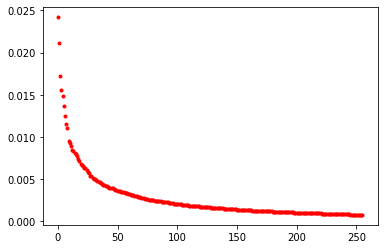

In [1]:
import sys
sys.path.append("..")
import os

import lauetools.LaueTools.IOimagefile as IOimage

import matplotlib.pyplot as plt
import numpy as np
from scipy import fft

from sklearn import metrics


def reduce(im, sx, sy, lp, hp):
    SX, SY = im.shape
    im_ = im.reshape(sx, SX // sx, sy,SY // sy).mean(-1).mean(1)
    #ss=cv2.dct(im_)
    ss=fft.dctn(im_)
    ss[:lp, :] = 0.
    ss[:, :lp] = 0.
    ss[hp:, :] = 0.
    ss[:, hp:] = 0.
    #return cv2.idct(ss), ss[lp: hp, lp: hp].ravel()
    return fft.idctn(ss), ss[lp: hp, lp: hp].ravel()

features=np.load('features4096.npy')

features=features.reshape((64*146,4096))

from sklearn.decomposition import PCA

n_pca=256
pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(features)#components_

plt.plot(np.arange(n_pca), pca.explained_variance_ratio_,'r.')


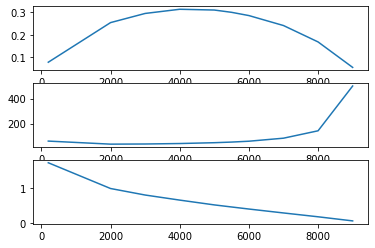

In [4]:
num=[200,2000,3000,4000,5000,5500,6000,7000,8000,9000]
sil=[]
cha_har=[]
dav_bou=[]
for i in range(len(num)):
    labels=np.load("label%i.npy"%num[i])
    sil.append(metrics.silhouette_score(pca_features,labels))
    cha_har.append(metrics.calinski_harabasz_score(pca_features,labels))
    dav_bou.append(metrics.davies_bouldin_score(pca_features,labels))

plt.subplot(3,1,1)
plt.plot(num,sil)
plt.subplot(3,1,2)
plt.plot(num,cha_har)
plt.subplot(3,1,3)
plt.plot(num,dav_bou)
    